# Transfer learning using MobileNetV2

#this test addition is to test whether i can commit changes from colab

# Transfer learning involves using a pre-trained model and then modifying the final layer to have the correct number of classes.
# This is a good way to save time and improve the accuracy of the model.

# Steps are as follows:
# 1. Load the pre-trained model
# 2. Modify the final layer to have the correct number of classes
# 3. Train the model on the new dataset
# 4. Save the model

In [1]:
# import the necessary libraries to perform the above steps using pytorch
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, Subset, random_split, ConcatDataset
from torchvision import transforms, models
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
from torch.optim import lr_scheduler
import numpy as np
import os
import json
import random

def setup_environment():
    try:
        # Check if running in Google Colab
        import google.colab
        print("Running in Google Colab.")

        # Mount Google Drive
        from google.colab import drive
        drive.mount('/content/drive')

        # Set the file path for Google Drive
        file_path = '/content/drive/My Drive/your_file_or_folder'
    except ImportError:
        # Local environment
        print("Running in local environment.")

        # Check for CUDA (NVIDIA GPU)
        if torch.cuda.is_available():
            print("CUDA GPU detected!")
            gpu_name = torch.cuda.get_device_name(0)  # Get name of the first CUDA GPU
            print(f"Using GPU: {gpu_name}")

        # Check for Apple GPU (Metal support)
        elif torch.backends.mps.is_available():
            print("Apple GPU detected with Metal support!")

        # No GPU detected
        else:
            print("No GPU detected. Running on CPU.")

        # Set the local file path
        file_path = '/path/to/your/local/file_or_folder'

    print(f"Using file path: {file_path}")
    return file_path

# Use the function
file_path = setup_environment()

# testing writing commit back to google colab

/Users/fergusproctor/miniforge3/envs/hand_gesture_detection/lib/python3.9/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/Users/fergusproctor/miniforge3/envs/hand_gesture_detection/lib/python3.9/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <FB2FD416-6C4D-3621-B677-61F07C02A3C5> /Users/fergusproctor/miniforge3/envs/hand_gesture_detection/lib/python3.9/site-packages/torchvision/image.so
  Reason: tried: '/opt/homebrew/lib/libjpeg.9.dylib' (no such file), '/libjpeg.9.dylib' (no such file), '/Users/fergusproctor/miniforge3/envs/hand_gesture_detection/lib/python3.9/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/fergusproctor/miniforge3/envs/hand_gesture_detection/lib/python3.9/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/Users/fergusproctor/miniforge3/envs/hand_gesture_detection/lib/python3.9/lib-dynload/../../libjpeg.9.dy

Running in local environment.
Apple GPU detected with Metal support!
Using file path: /path/to/your/local/file_or_folder


In [ ]:

# ensure that Mac M1 GPU is being used
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# load the pre-trained model
model = models.mobilenet_v2(pretrained=True)

# print the model architecture
#

/Users/fergusproctor/miniforge3/envs/hand_gesture_detection/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/fergusproctor/miniforge3/envs/hand_gesture_detection/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:


# save path to training data at /Users/fergusproctor/Library/CloudStorage/OneDrive-Personal/Documents/Robotics Masters/Vision por Computadora/Proyecto Vision/Proyecto Vision-Fergus’s MacBook Air
training_data_path = "/Users/fergusproctor/dev/unified_dataset"


train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(torch.tensor([0.485, 0.456, 0.406]), torch.tensor([0.229, 0.224, 0.225]))
])

class SafeImageFolder(datasets.ImageFolder):
    def __getitem__(self, index):
        try:
            return super(SafeImageFolder, self).__getitem__(index)
        except Exception as e:
            print(f"Skipping corrupted image at index {index}")
            return None  # Or handle appropriately

full_training_data = datasets.ImageFolder(root=training_data_path,
    transform=train_transforms)
 # Exclude None entries

# Load all data from the training data path using ImageFolder
#full_training_data = datasets.ImageFolder(
#    root=training_data_path,
#    transform=train_transforms
#)





# Access the mapping
class_to_idx = full_training_data.class_to_idx

print("Class-to-Index Mapping:")
print(class_to_idx)


# Calculate the number of samples for the test set (10% of the total data)
test_size = int(0.1 * len(full_training_data))  # 10% of the dataset
train_size = len(full_training_data) - test_size  # Remaining 90% for training


# Split the data into training and test sets
train_data, test_data = random_split(full_training_data, [train_size, test_size])



# Create DataLoaders for both training and test datasets
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Print the number of images in the training and test sets
print(f"Number of images in the training set: {len(train_data)}")
print(f"Number of images in the test set: {len(test_data)}")





Class-to-Index Mapping:
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'del': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'nothing': 15, 'o': 16, 'p': 17, 'q': 18, 'r': 19, 's': 20, 'space': 21, 't': 22, 'u': 23, 'v': 24, 'w': 25, 'x': 26, 'y': 27, 'z': 28}
Number of images in the training set: 88205
Number of images in the test set: 9800


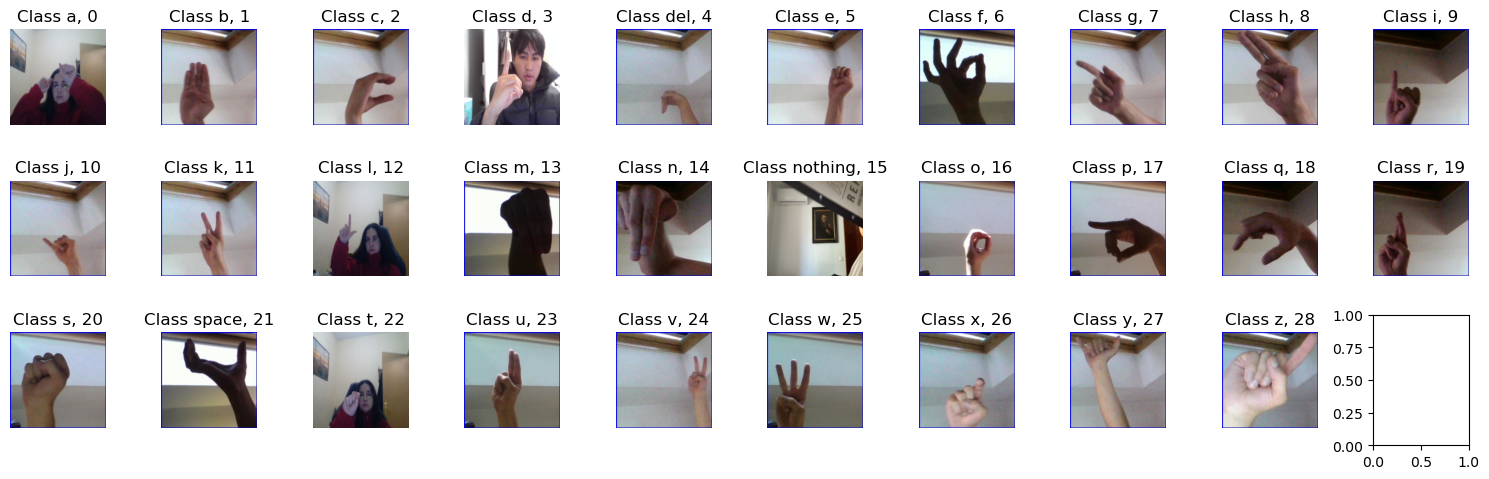

In [ ]:
# Get a list of all classes
classes = full_training_data.classes

# Create a figure with subplots
fig, axes = plt.subplots(3, 10, figsize=(15, 5))
axes = axes.ravel()

# For each class
for idx, class_name in enumerate(classes):
    # Get indices of all images in this class
    class_indices = [i for i, (_, label) in enumerate(full_training_data.samples) if label == idx]

    # Randomly select one image from this class
    random_idx = random.choice(class_indices)
    img, _ = full_training_data[random_idx]

    # Convert tensor to numpy array and transpose to correct dimensions
    img = img.permute(1, 2, 0).numpy()

    # Denormalize the image
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean

    # Clip values to be between 0 and 1
    img = np.clip(img, 0, 1)

    # Plot the image
    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_title(f'Class {class_name}, {idx}')

plt.tight_layout()
plt.show()


In [ ]:
# update the final layer of the model to have the correct number of classes, which is the
# number of classes in the training data
num_classes = len(full_training_data.classes)
print(num_classes)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

# print the model architecture
print(model)

29
MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, e

In [ ]:
print(device)

mps


In [ ]:
model.to(device)

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
# Freeze all layers except the classifier
for param in model.features.parameters():
    param.requires_grad = False

# Verify only classifier is trainable
for name, param in model.named_parameters():
    if "classifier" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.classifier.parameters(), lr=0.001)



model = model.to(device)

print(device)

# Number of epochs
num_epochs = 10


# Training loop
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0

    for inputs, labels in train_loader:  # training_data is your DataLoader
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print epoch loss
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_data)}")




mps
Epoch 1/10, Loss: 0.04698029921361766
Epoch 2/10, Loss: 0.037115233592263736
Epoch 3/10, Loss: 0.030831184126907624
Epoch 4/10, Loss: 0.02676425359665513
Epoch 5/10, Loss: 0.023932025497593948
Epoch 6/10, Loss: 0.021835398909172687
Epoch 7/10, Loss: 0.020262614918176797
Epoch 8/10, Loss: 0.01901755620951988
Epoch 9/10, Loss: 0.017982055433928633
Epoch 10/10, Loss: 0.01713639950240039


In [ ]:
# save model to device
# Save the model's state dictionary
torch.save(model.state_dict(), 'mobilenet_sign_w_user_data_10_ep.pth')
print("Model saved successfully!")


Model saved successfully!


In [ ]:
import torch
from torchvision import models

# Instantiate the model (same architecture as before)
model = models.mobilenet_v2(pretrained=False)

# If you made changes to the model, apply them (e.g., modifying the classifier)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 29)

# Load the saved model weights
model.load_state_dict(torch.load('../networks/mobilenet_sign_w_user_data_10_ep.pth'))

# Set the model to evaluation mode for inference
model.eval()

print("Model loaded successfully!")


Model loaded successfully!


/var/folders/dv/3vlkd_t53j9gr9ggfhz4wg2w0000gn/T/ipykernel_1877/837450178.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('../networks/

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# test out model

# Set model to evaluation mode
model.eval()

# Initialize lists to store predictions and actual labels
predictions = []
actual_labels = []
running_test_loss = 0.0

with torch.no_grad():  # Disable gradient calculation
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, labels)
        running_test_loss += loss.item()

        # Get predictions
        _, predicted = torch.max(outputs.data, 1)

        # Store predictions and labels
        predictions.extend(predicted.cpu().numpy())
        actual_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(actual_labels, predictions)
print(f"Test Loss: {running_test_loss/len(test_loader):.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(actual_labels, predictions))

# Create confusion matrix
cm = confusion_matrix(actual_labels, predictions)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


RuntimeError: Input type (MPSFloatType) and weight type (torch.FloatTensor) should be the same

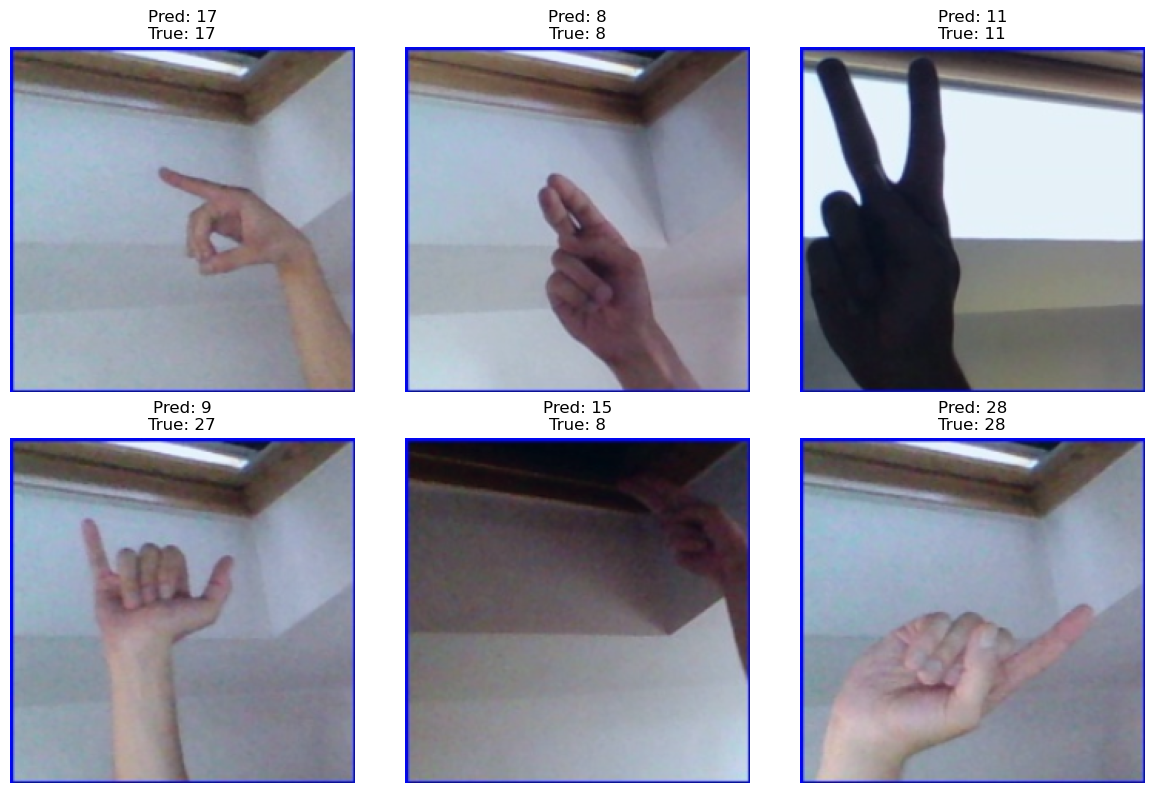

In [ ]:
# show test images, predictions and true classes alongside each other
# Get a batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Make predictions
with torch.no_grad():
    outputs = model(images.to(device))
    _, predicted = torch.max(outputs.data, 1)

# Convert tensors to numpy arrays
images = images.cpu().numpy()
predicted = predicted.cpu().numpy()
labels = labels.cpu().numpy()

# Plot 6 images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

for idx in range(6):
    # Get the image and normalize it
    img = np.transpose(images[idx], (1, 2, 0))
    img = (img - img.min()) / (img.max() - img.min())

    # Plot image
    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_title(f'Pred: {predicted[idx]}\nTrue: {labels[idx]}')

plt.tight_layout()
plt.show()